In [10]:
# training evaluation
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# loading data
loading = np.load("training_qualities.npz")

dead = loading["dead"]
number_of_steps = loading["number_of_steps"]
end_score = loading["end_score"]
total_reward = loading["total_reward"]
loading.close()

In [12]:
# markers
n_iter = 100

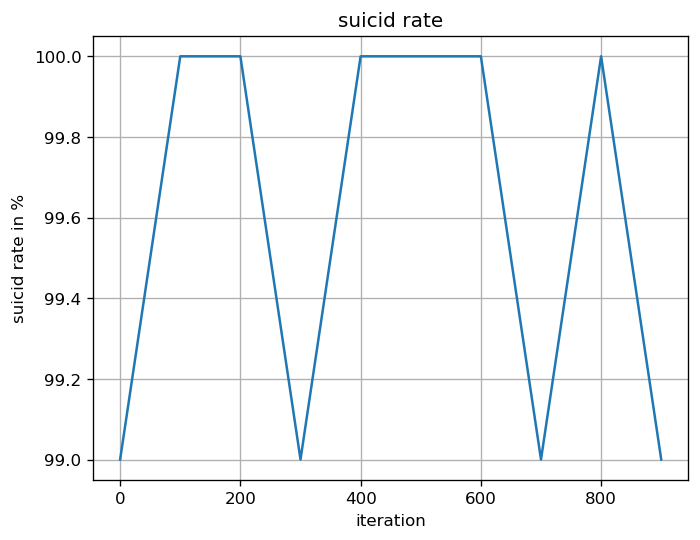

In [13]:
# get the suicid rate averaged over n_iter iterations
suicid_rate = []
for i in range(len(dead) // n_iter):
    suicid_rate.append(np.mean(dead[i*n_iter: (i + 1)*n_iter]) * 100)

# plot suicid rate
plt.figure(dpi=120)

plt.plot(np.arange(len(suicid_rate)) * n_iter, suicid_rate)

plt.grid()
plt.ylabel("suicid rate in %")
plt.xlabel("iteration")
plt.title("suicid rate")

#plt.axvline(N_big_field)

plt.show()

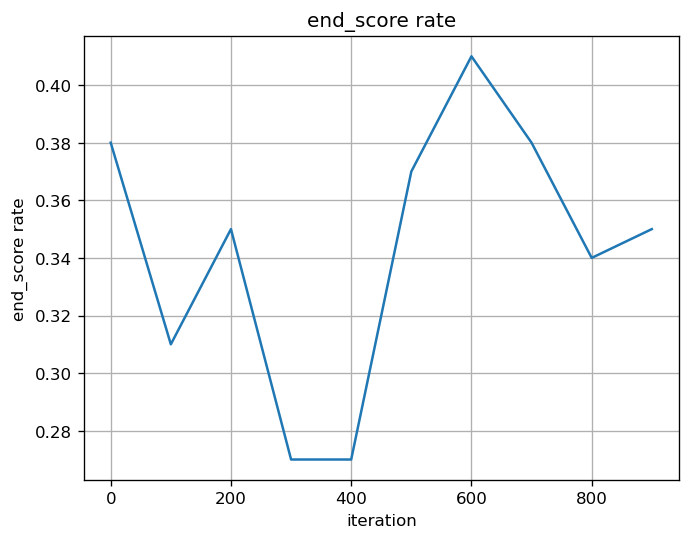

In [14]:
# get the end_score rate averaged over n_iter iterations
end_score_rate = []
for i in range(len(end_score) // n_iter):
    end_score_rate.append(np.mean(end_score[i*n_iter: (i + 1)*n_iter]))

# plot end_score rate
plt.figure(dpi=120)

plt.plot(np.arange(len(end_score_rate)) * n_iter, end_score_rate)

plt.grid()
plt.ylabel("end_score rate")
plt.xlabel("iteration")
plt.title("end_score rate")
#plt.axvline(N_big_field)

plt.show()

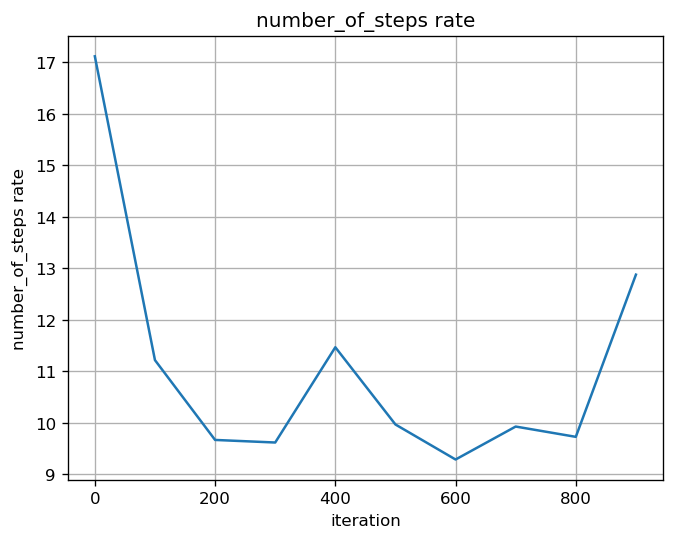

In [15]:
# get the number_of_steps rate averaged over n_iter iterations
number_of_steps_rate = []
for i in range(len(number_of_steps) // n_iter):
    number_of_steps_rate.append(np.mean(number_of_steps[i*n_iter: (i + 1)*n_iter]))

# plot end_score rate
plt.figure(dpi=120)

plt.plot(np.arange(len(number_of_steps_rate)) * n_iter, number_of_steps_rate)

plt.grid()
plt.ylabel("number_of_steps rate")
plt.xlabel("iteration")
plt.title("number_of_steps rate")
#plt.axvline(N_big_field)

plt.show()

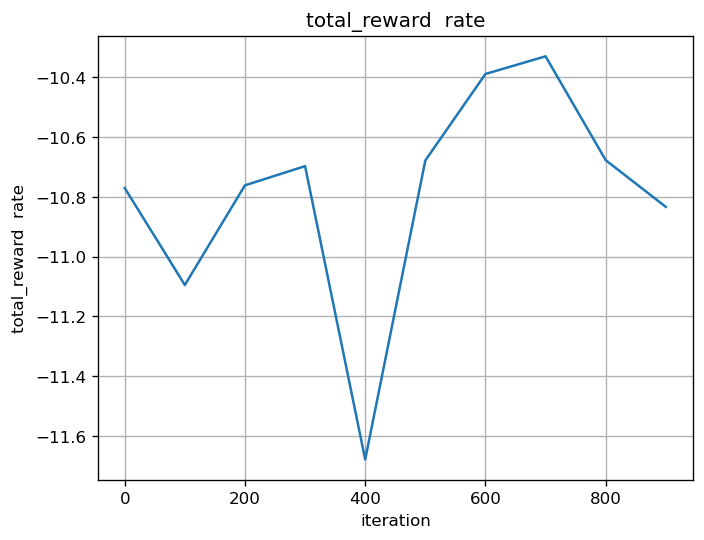

In [16]:
# get the total_reward rate averaged over n_iter iterations
total_reward_rate = []
for i in range(len(total_reward ) // n_iter):
    total_reward_rate.append(np.mean(total_reward [i*n_iter: (i + 1)*n_iter]))

# plot end_score rate
plt.figure(dpi=120)

plt.plot(np.arange(len(total_reward_rate)) * n_iter, total_reward_rate)

plt.grid()
plt.ylabel("total_reward  rate")
plt.xlabel("iteration")
plt.title("total_reward  rate")
#plt.axvline(N_big_field)

plt.show()

In [8]:
total_reward

array([ 24.6,  24.6,  24.1, ..., -27.2,  17.5,  10.7])

In [9]:
np.sum(dead)/10000

0.0006

In [44]:
r_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
i = 7
k = 5

In [47]:
r_cumsum = np.array(r_list[i: np.min([i + k, len(r_list)])])

In [50]:
r_cumsum[len(r_cumsum) - 1]

10

In [245]:
import torch
from torch import nn

# define our network architecture for the Deep-Q-Learning model
class DeepQNetwork(nn.Module):
    def __init__(self, n_input, n_hidden = 100):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(n_input, n_hidden),
            nn.SiLU(),
            nn.Linear(n_hidden, n_hidden),
            nn.SiLU(),
            nn.Linear(n_hidden, n_hidden),
            nn.SiLU(),
            nn.Linear(n_hidden, n_hidden),
            nn.SiLU(),
            nn.Linear(n_hidden, 6)
        )

    def forward(self, features):
        logits = self.linear_relu_stack(features)
        return logits
        
Q_Network = torch.load("DeepQNetwork.pth")

ModuleNotFoundError: No module named 'agent_code'

In [246]:
model = torch.jit.load('model_scripted.pt')
model.eval()

RecursiveScriptModule(
  original_name=DeepQNetwork
  (flatten): RecursiveScriptModule(original_name=Flatten)
  (linear_relu_stack): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(original_name=Linear)
    (1): RecursiveScriptModule(original_name=SiLU)
    (2): RecursiveScriptModule(original_name=Linear)
    (3): RecursiveScriptModule(original_name=SiLU)
    (4): RecursiveScriptModule(original_name=Linear)
    (5): RecursiveScriptModule(original_name=SiLU)
    (6): RecursiveScriptModule(original_name=Linear)
    (7): RecursiveScriptModule(original_name=SiLU)
    (8): RecursiveScriptModule(original_name=Linear)
  )
)

In [256]:
features = torch.tensor([ 34.,  23,  0.,  0.,  0.,  43, -1., -1., -1., -1., -1., -1., -1., -1.,
         0.,  0.,  0.,  0.,  0., -1., -1.,  0., -1.,  0., -1.,  0., -1., -1.,
         0.,  0.,  0.,  0.,  32, -1., -1.,  0., -1.,  0., -1.,  0., -1., -1.,
         0.,  0.,  0.,  0.,  0., -1., -2., -4., -1., -1., -1., -1., -1.,  0])
model.forward(features)

tensor([13.0446, 14.2250, 14.1875, 14.9257,  0.0243, -0.8996],
       grad_fn=<DifferentiableGraphBackward>)

In [17]:
from torch import nn

In [96]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(4, 4, 2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(4, 5, 2)
        self.fc1 = nn.Linear(45 , 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 6)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x) # flatten all dimensions except batch
        x = F.silu(self.fc1(x))
        x = F.silu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
eye = np.eye(17)
net.forward(torch.FloatTensor([eye, eye, eye, eye]))

tensor([-0.1517,  0.0800,  0.0953, -0.0653, -0.0211,  0.0315],
       grad_fn=<ViewBackward0>)

In [68]:
import torch
conv1 = nn.Conv2d(1, 3, 3)
import numpy as np

In [69]:
eye = torch.FloatTensor([np.eye(7)])
eye

tensor([[[1., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 0., 0., 1.]]])

In [70]:
conv1(eye).shape

torch.Size([3, 5, 5])

In [50]:
input

tensor([[[-1.0477e+00, -1.8464e+00,  3.8303e-01, -8.2010e-02, -1.4150e+00,
          -2.2737e-01, -1.0479e-01, -2.0514e+00,  3.3706e-01, -5.2975e-01,
          -2.7472e-01, -1.9997e-01, -2.9261e-01,  3.6066e-01,  7.1925e-01,
           1.0761e+00, -3.1615e+00, -4.4989e-01, -2.4386e+00, -1.0476e+00,
          -3.0010e-02,  1.0675e+00,  1.4759e+00, -2.2685e-01,  1.3342e-01,
          -1.0746e+00,  3.2383e-01, -4.2972e-01, -3.2253e-01,  5.1955e-01,
          -6.7477e-01,  1.1848e+00, -5.5486e-01, -1.0500e+00, -6.7665e-01,
           7.3118e-01,  7.1541e-01,  8.1201e-01,  6.2092e-01,  1.3664e+00,
          -3.1148e-01,  1.0827e+00, -8.6113e-01, -1.4514e+00, -1.7310e+00,
           2.3103e+00, -6.2512e-01, -1.1069e-01, -9.4120e-01, -6.8239e-01]],

        [[ 8.5307e-01, -1.9041e+00, -4.1509e-01, -1.3227e+00,  8.7580e-01,
           1.3439e-01, -1.8973e-01, -1.5773e-01,  7.3783e-01,  4.4267e-02,
           6.6564e-01, -1.0470e+00, -2.0352e+00,  7.3792e-01, -2.6488e-01,
           6.7898e-01,

In [47]:
m(input).shape

torch.Size([20, 33, 48])

In [ ]:
#Idee: nutze die letzten 4 Zustände als Input --> also die letzten 4 Bilder speichern!!!

In [86]:
a = torch.eye(3)

In [88]:
torch.all(a == 0)

tensor(False)

In [89]:
a = [0, 1, 2, 3, 4, 5]

In [93]:
a[-4:]

[2, 3, 4, 5]

In [97]:
import numpy as np
eye = np.eye(17)
image = np.array([eye, eye, eye, eye])

In [105]:
np.savez("test.npz", image=image)

In [106]:
image2 = np.load("test.npz")

In [108]:
image2["image"].shape

(4, 17, 17)

In [110]:
import torch
torch.tensor(image).numpy()

array([[[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]])